**Crime in the United States Analysis** 

- Exploring Crime Trends, State-wise Comparisons & Correlation Analysis

This project analyzes crime rates across different **years and states** in the U.S.  
We aim to:

- **Understand how crime trends evolve over time**  

- **Identify states with high/low crime rates**  

- **Explore correlations between crime & population factors**  

Step 1: Load & Inspect the Dataset

Before starting the analysis, we first **load the dataset** and check for:

- Column names & structure

- Missing values

- Data types

In [17]:
import pandas as pd 

crime_data = pd.read_csv("Crime in the United States.csv")

print(crime_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 14 non-null     int64  
 1   Violent Crime Rate   14 non-null     float64
 2   Robbery Rate         14 non-null     float64
 3   Property Crime Rate  14 non-null     float64
 4   Burglary Rate        14 non-null     float64
 5   Larceny Theft Rate   14 non-null     float64
 6   Vehicle Theft Rate   14 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 916.0 bytes
None


In [18]:
print(crime_data.isnull().sum())

Year                   0
Violent Crime Rate     0
Robbery Rate           0
Property Crime Rate    0
Burglary Rate          0
Larceny Theft Rate     0
Vehicle Theft Rate     0
dtype: int64


- Since there is no null values, we can move forward to checking if our dataset contains any duplicated values.

In [19]:
print(crime_data.duplicated().sum())

0


- No duplicates values also.

**Step 2: Data Cleaning & Modification**

Data cleaning ensures we work with accurate data.  
Here, we will:

- **Handle missing values**

- **Fix column names**  

- **Convert data types for proper analysis**

In [20]:
crime_data.columns = crime_data.columns.str.strip() # This gonna remove any unwanted spaces from our column labels

crime_data.fillna(0, inplace=True)                  # fill null values with making a permanent change in the dataset (inplace=True)

crime_data["Year"] = crime_data["Year"].astype(int) # Converting year into int data type for computations for visualizations.


Step 3: Exploratory Data Analysis (EDA)

Let's start by:

- Understanding **summary statistics**  

- Identifying **trends over time**  

- Finding **top & least crime committed category**

In [21]:
crime_data.describe() # basic stats summary of our dataset


,Year,Violent Crime Rate,Robbery Rate,Property Crime Rate,Burglary Rate,Larceny Theft Rate,Vehicle Theft Rate
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2006.5000,450.164286,135.164286,3269.478571,715.014286,2211.014286,343.435714
std,4.1833,46.164899,14.843523,321.355708,36.169491,206.552857,88.989598
min,2000.0000,367.900000,109.100000,2730.700000,610.000000,1899.400000,221.300000
25%,2003.2500,411.350000,122.750000,2969.750000,705.400000,2020.475000,244.125000
50%,2006.5000,466.100000,141.650000,3311.500000,727.850000,2199.300000,382.550000
75%,2009.7500,478.425000,146.050000,3571.925000,733.075000,2402.950000,420.325000
max,2013.0000,506.500000,150.000000,3658.100000,747.000000,2485.700000,433.700000


- **Most Common crimes**

C:\Users\GAMERS\AppData\Local\Temp\ipykernel_3992\2798479343.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_totals.index, y=crime_totals.values, palette="Reds_r",hue=None)


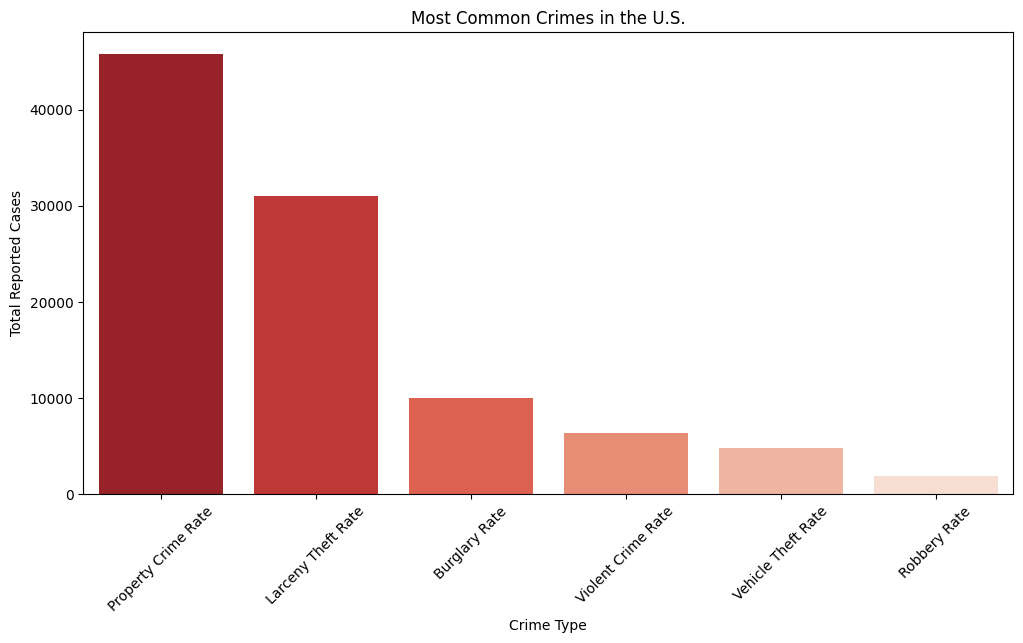

In [22]:
# Select crime related columns excluding year.
crime_types = ["Violent Crime Rate", "Robbery Rate", "Property Crime Rate", 
               "Burglary Rate", "Larceny Theft Rate", "Vehicle Theft Rate"]
# Sum each type of crime across all years
crime_totals = crime_data[crime_types].sum().sort_values(ascending=False) # straight forward suming each column by taking column lable as index and sorting it into ascending order

# Plot the most common crimes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=crime_totals.index, y=crime_totals.values, palette="Reds_r",hue=None)
plt.title("Most Common Crimes in the U.S.")
plt.ylabel("Total Reported Cases")
plt.xlabel("Crime Type")
plt.xticks(rotation=45)
plt.show()

**Lets also check the overall violent crime rate trend throughout the years.**

- Line graph

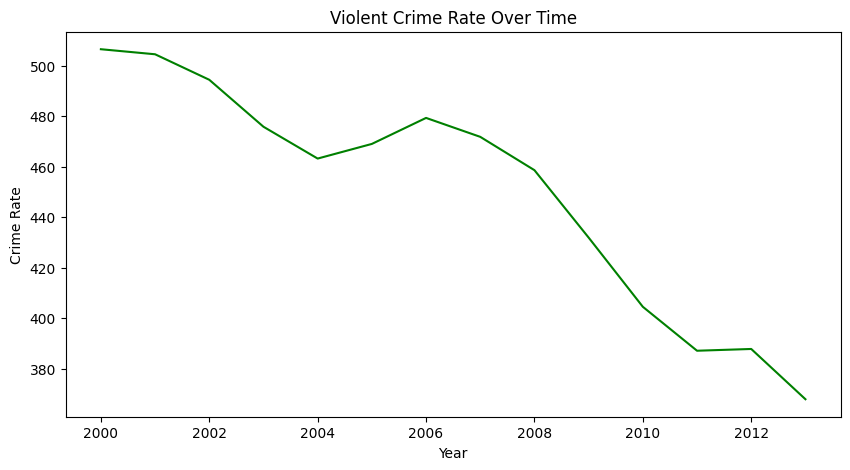

In [23]:

plt.figure(figsize=(10, 5))
sns.lineplot(data=crime_data, x="Year", y="Violent Crime Rate",color='green')
plt.title("Violent Crime Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Crime Rate")
plt.show()

**The heatmap below is extention to our line graph and helps us understand it more.**

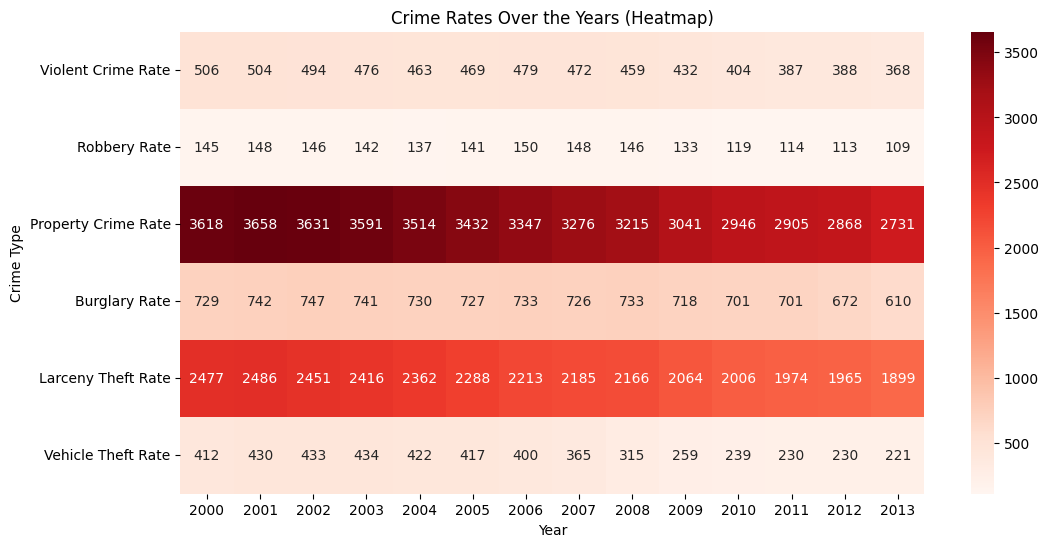

In [24]:


plt.figure(figsize=(12, 6))
sns.heatmap(crime_data.set_index("Year")[crime_types].T, cmap="Reds", annot=True, fmt=".0f")

plt.title("Crime Rates Over the Years (Heatmap)")
plt.xlabel("Year")
plt.ylabel("Crime Type")
plt.show()

**Observations from our line chart**

- There was a little increase in the crime rate around 2006

- Now we'll analyze the crime what were the top and least crime committed in year 2006

In [25]:
crime_year_data = crime_data[crime_data["Year"] == 2006] # creating an variable for our year 2006 with all its info.

print(crime_year_data)

   Year  Violent Crime Rate  Robbery Rate  Property Crime Rate  Burglary Rate  \
6  2006               479.3         150.0               3346.6          733.1   

   Larceny Theft Rate  Vehicle Theft Rate  
6              2213.2               400.2  


In [39]:

# Get the crime type with the highest rate
most_committed_crime = crime_year_data[crime_types].idxmax(axis=1).values[0] #This is checking the max value throughout the columns (axis=1) and storing the value in our variable but this is only the name of the crime.
highest_crime_rate = crime_year_data[most_committed_crime].values[0] #This is fecthing the actual value on the basis of the name that we got in "most_committed_crime" variable

least_committed_crime = crime_year_data[crime_types].idxmin(axis=1).values[0] #Same logic but for min value(idxmin())
lowest_crime_rate = crime_year_data[least_committed_crime].values[0]

print(f" In {2006}, the most committed crime was '{most_committed_crime}' with a rate of {highest_crime_rate} ") 
print(f" In {2006}, the least committed crime was '{least_committed_crime}' with a rate of {lowest_crime_rate} ")

 In 2006, the most committed crime was 'Property Crime Rate' with a rate of 2730.7 
 In 2006, the least committed crime was 'Robbery Rate' with a rate of 109.1 


C:\Users\GAMERS\AppData\Local\Temp\ipykernel_3992\1429878936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_types, y=crime_year_data[crime_types].values.flatten(), palette="Blues_r",hue=None)


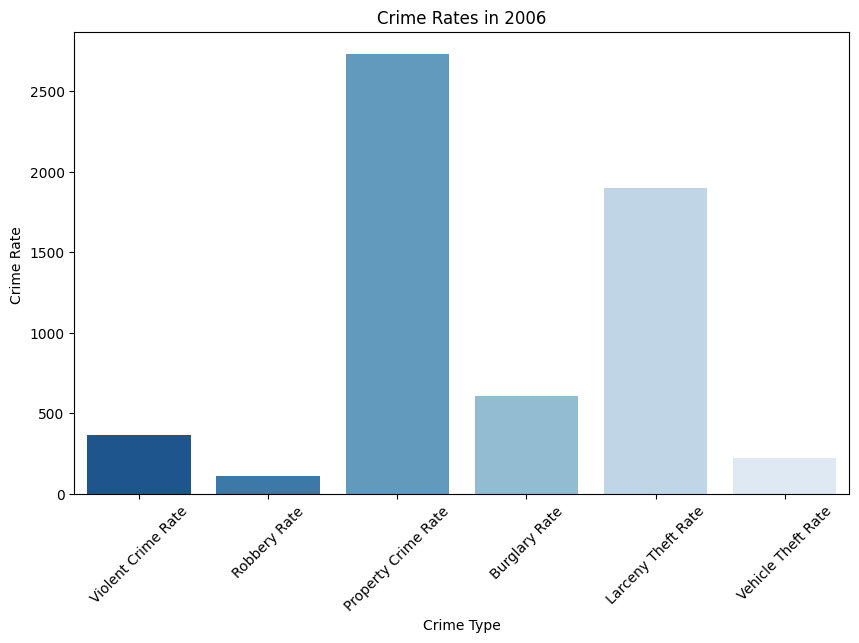

In [ ]:

# Plot crime rates for year 2006
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_types, y=crime_year_data[crime_types].values.flatten(), palette="Blues_r",hue=None)
plt.title(f"Crime Rates in {2006}")
plt.ylabel("Crime Rate ")
plt.xlabel("Crime Type")
plt.xticks(rotation=45)
plt.show()x

In [36]:
for year_data in crime_data["Year"]:#for loop for checking most commited crime and least commited crime for every year.
    crime_year_data = crime_data[crime_data["Year"] == year_data ]

    most_committed_crime = crime_year_data[crime_types].idxmax(axis=1).values[0] 
    highest_crime_rate = crime_year_data[most_committed_crime].values[0]         

    print(f" In {year_data}, the most committed crime was '{most_committed_crime}' with a rate of {highest_crime_rate} ", end="")

    least_committed_crime = crime_year_data[crime_types].idxmin(axis=1).values[0]
    lowest_crime_rate = crime_year_data[least_committed_crime].values[0]

    print(f" and ,the least committed crime was '{least_committed_crime}' with a rate of {lowest_crime_rate} ")


 In 2000, the most committed crime was 'Property Crime Rate' with a rate of 3618.3  and ,the least committed crime was 'Robbery Rate' with a rate of 145.0 
 In 2001, the most committed crime was 'Property Crime Rate' with a rate of 3658.1  and ,the least committed crime was 'Robbery Rate' with a rate of 148.5 
 In 2002, the most committed crime was 'Property Crime Rate' with a rate of 3630.6  and ,the least committed crime was 'Robbery Rate' with a rate of 146.1 
 In 2003, the most committed crime was 'Property Crime Rate' with a rate of 3591.2  and ,the least committed crime was 'Robbery Rate' with a rate of 142.5 
 In 2004, the most committed crime was 'Property Crime Rate' with a rate of 3514.1  and ,the least committed crime was 'Robbery Rate' with a rate of 136.7 
 In 2005, the most committed crime was 'Property Crime Rate' with a rate of 3431.5  and ,the least committed crime was 'Robbery Rate' with a rate of 140.8 
 In 2006, the most committed crime was 'Property Crime Rate' wit

As we can analyse from the output above **Property Crime Rate** and **Robbery Rate** were the most and least committed crimes respectively.

Step 4: Analysis by Type of Crime

Let's find


- **Every crime peak year** 

- **Top Five Years With Highest Crime Rate**

- **Least Five Years With Least Crime Rate**




**Identifying Peak Crime Years**

- Find the year when crime was highest for each category.

In [29]:

# Find the year with the highest crime for each type
peak_crime_years = crime_data.set_index("Year")[crime_types].idxmax()

print(peak_crime_years)



Violent Crime Rate     2000
Robbery Rate           2006
Property Crime Rate    2001
Burglary Rate          2002
Larceny Theft Rate     2001
Vehicle Theft Rate     2003
dtype: int32


In [30]:
crime_data.columns

Index(['Year', 'Violent Crime Rate', 'Robbery Rate', 'Property Crime Rate',
       'Burglary Rate', 'Larceny Theft Rate', 'Vehicle Theft Rate'],
      dtype='object')

- **Top Five Years With Highest Crime Rate**

In [31]:
# Get the top 5 years with the highest crime rate
top_years = crime_data.groupby('Year')["Violent Crime Rate"].mean().nlargest(5)

# Display results
top_years

Year
2000    506.5
2001    504.5
2002    494.4
2006    479.3
2003    475.8
Name: Violent Crime Rate, dtype: float64

- **Least Five Years With Least Crime Rate**

In [32]:
# Get the top 5 years with the highest crime rate
least_years = crime_data.groupby('Year')["Violent Crime Rate"].mean().nsmallest(5)

# Display results
least_years

Year
2013    367.9
2011    387.1
2012    387.8
2010    404.5
2009    431.9
Name: Violent Crime Rate, dtype: float64

**Step 5:  Correlation Between Crime Types and Predicting Future Trends (Rolling Average)**

- Do different crimes happen together?

- Is there a pattern in how crime rates relate?

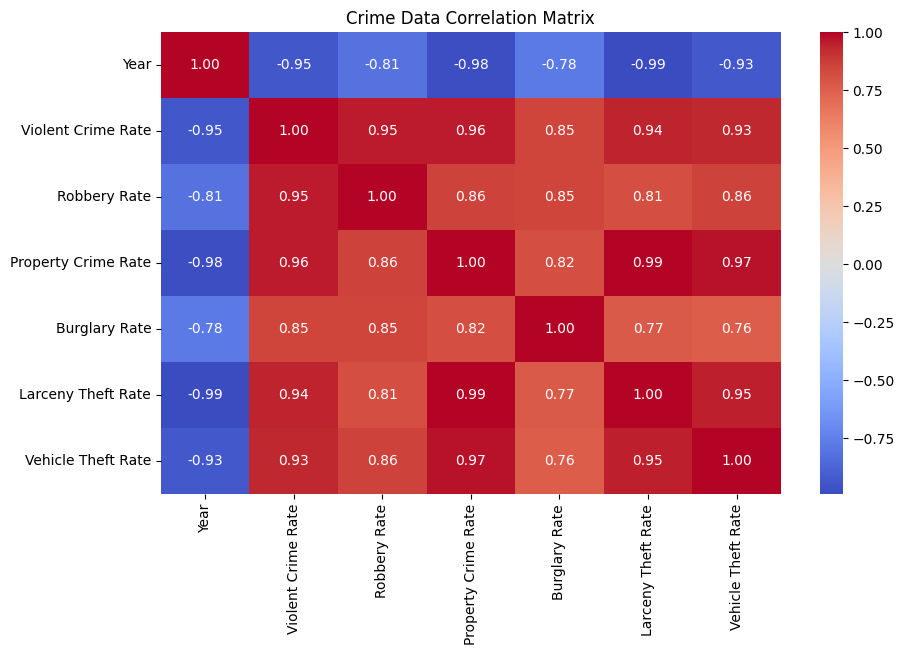

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(crime_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Crime Data Correlation Matrix")
plt.show()

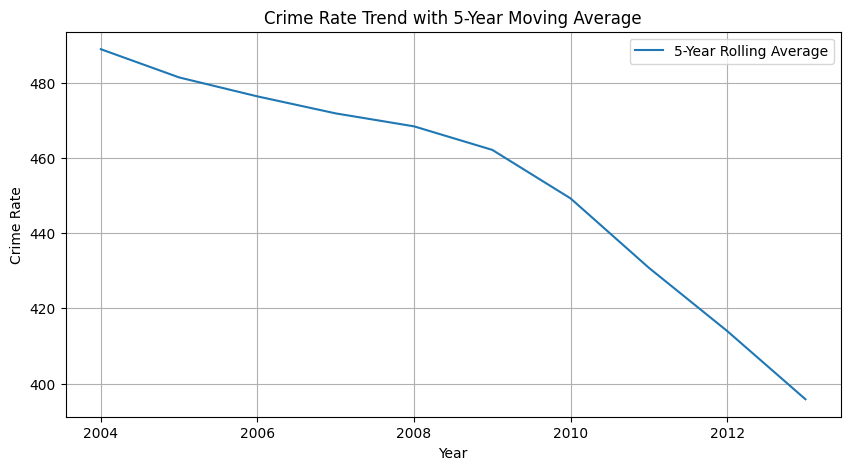

In [34]:
crime_data["Violent Crime MA"] = crime_data["Violent Crime Rate"].rolling(window=5).mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=crime_data, x="Year", y="Violent Crime MA", label="5-Year Rolling Average")
plt.title("Crime Rate Trend with 5-Year Moving Average")
plt.xlabel("Year")
plt.ylabel("Crime Rate")
plt.legend()
plt.grid(True)
plt.show()


**According to our 5-year moving average analysis crime rates were actually decreasing as the year increases**

 Key Insights from the Crime Analysis

1️ Overall Crime Trends (2000 - Latest Year)

- Property crimes consistently had the highest crime rates, especially Larceny Theft & Burglary.

- Violent crimes (e.g., Robbery, Assault) show a gradual decline over time.

- Vehicle theft peaked in 2003, but later declined, possibly due to improved security measures in vehicles.

2️ Peak Crime Years & Crime Types

- Most crimes peaked between 2000-2006, indicating higher crime rates in early 2000s.

- Property Crime Rate (2001) & Larceny Theft Rate (2001) had the highest recorded values.

- Robbery Rate peaked in 2006, while Violent Crime Rate peaked in 2000.

3️ Rolling Average & Long-Term Trends
- The 5-year rolling average revealed that crime rates generally declined over time, especially violent crimes.

- Despite an overall decrease, property-related crimes still remain high compared to violent crimes.

- The decline in crime rate may be attributed to better law enforcement policies, economic stability, and improved surveillance technologies.